<a href="https://colab.research.google.com/github/Usman-938/Assignments/blob/main/Class_Work_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform customer segmentation using K-Means and Hierarchical Clustering on a dataset that you will provide. This will involve data loading, feature scaling, K-Means clustering with optimization of the number of clusters (K) using Elbow and Silhouette methods, and Hierarchical Clustering with dendrogram visualization.

## Load and Prepare Data

### Subtask:
Load the dataset and inspect its structure. This will include identifying and selecting relevant numerical features for clustering (e.g., Age, Income, Spending Score) and removing identifier columns (e.g., CustomerID) that do not represent behavior.


### Load Dataset and Initial Inspection

We will start by loading the dataset into a pandas DataFrame. After loading, we will display the first few rows to get a quick overview of the data's structure and content. Following that, we'll use `df.info()` to inspect data types and non-null values, and `df.describe()` to get statistical summaries of numerical columns. Finally, we will prepare the data for clustering by identifying and removing any identifier columns and selecting relevant numerical features as specified in the subtask.

**Reasoning**:
Now I will write the Python code to load the dataset, perform the initial inspections, remove identifier columns, and select the relevant numerical features as described in the subtask and the preceding markdown block.



### Characterizing K-Means Clusters

To understand the profiles of the identified customer segments, we will analyze the mean values of the original features ('Age', 'Annual Income (k$)', 'Spending Score (1-100)') for each cluster. This allows us to interpret what each cluster represents in terms of customer behavior and demographics.

In [ ]:
# Calculate the mean of each feature for each K-Means cluster
k_means_cluster_summary = df_clustered_optimal.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

print("K-Means Cluster Summary (Mean of Features per Cluster):")
print(k_means_cluster_summary)

K-Means Cluster Summary (Mean of Features per Cluster):
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.250000           26.750000               18.350000
1        25.185185           41.092593               62.240741
2        32.875000           86.100000               81.525000
3        39.871795           86.102564               19.358974
4        55.638298           54.382979               48.851064


### Visualizing Hierarchical Clusters in 3D

To provide an even better representation of the clusters and their separation, a 3D scatter plot of the Hierarchical Clusters will be generated. This plot will use 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' to show the spatial distribution of the clusters.

/tmp/ipython-input-3104958348.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_clusters))


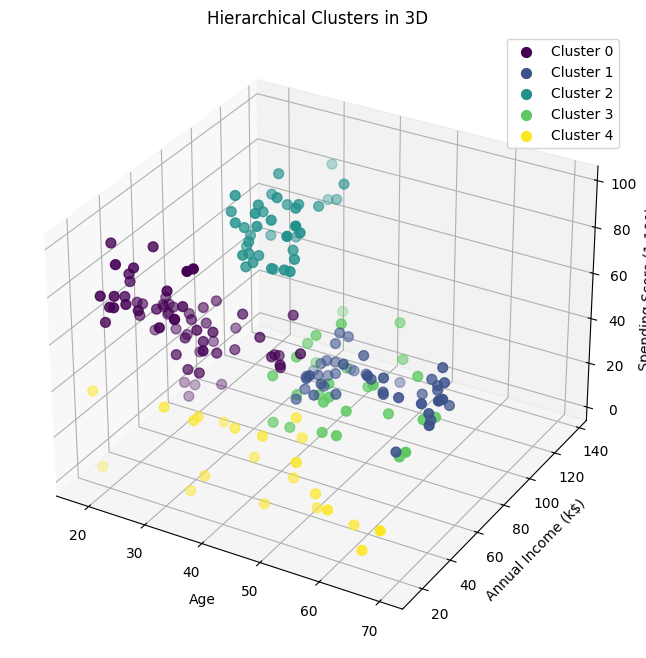

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Get unique cluster labels
unique_clusters = df_hierarchical_clustered['H_Cluster'].unique()

# Define colors for clusters
colors = plt.cm.get_cmap('viridis', len(unique_clusters))

for i, cluster_num in enumerate(sorted(unique_clusters)):
    cluster_data = df_hierarchical_clustered[df_hierarchical_clustered['H_Cluster'] == cluster_num]
    ax.scatter(
        cluster_data['Age'],
        cluster_data['Annual Income (k$)'],
        cluster_data['Spending Score (1-100)'],
        label=f'Cluster {cluster_num}',
        color=colors(i),
        s=50 # marker size
    )

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Hierarchical Clusters in 3D')
ax.legend()
plt.show()

In [ ]:
import pandas as pd

# Download the dataset if not already present from a reliable source
!wget -nc https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv

# 1. Load the dataset into a pandas DataFrame
# Assuming the dataset is named 'Mall_Customers.csv' and is in the same directory
df = pd.read_csv('Mall_Customers.csv')

# 2. Display the first few rows of the DataFrame
print("First 5 rows of the dataset:")
print(df.head())

# 3. Get a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# 4. Display descriptive statistics for the numerical columns
print("\nDescriptive statistics:")
print(df.describe())

# 5. Identify and remove identifier columns and select relevant numerical features
# Based on typical Mall Customer datasets, 'CustomerID' is an identifier.
# 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' are relevant for clustering.

# Dropping 'CustomerID' as it's an identifier and not useful for clustering behavior.
# We will then select the specified numerical features.
df_clustering = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

print("\nDataFrame prepared for clustering (first 5 rows):")
print(df_clustering.head())

print("\nShape of the clustering DataFrame:", df_clustering.shape)

--2026-02-07 07:01:25--  https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4286 (4.2K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   4.19K  --.-KB/s    in 0s      

2026-02-07 07:01:25 (37.0 MB/s) - ‘Mall_Customers.csv’ saved [4286/4286]

First 5 rows of the dataset:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                     

## Apply Feature Scaling

### Subtask:
Apply feature scaling (e.g., StandardScaler) to the selected numerical features. This step will also include a justification of why scaling is required before applying distance-based clustering algorithms.


### Justification for Feature Scaling

Feature scaling is a critical preprocessing step before applying distance-based clustering algorithms such as K-Means and Hierarchical Clustering. The primary reason is that these algorithms rely on distance metrics (e.g., Euclidean distance) to determine the similarity or dissimilarity between data points.

Without scaling, features with larger numerical ranges or higher variances will disproportionately influence the distance calculations, effectively dominating the clustering process. For instance, if one feature like 'Annual Income (k$)' ranges from 15 to 137, while 'Spending Score (1-100)' ranges from 1 to 99, the income feature will contribute more to the overall distance between two points simply due to its larger scale. This can lead to biased clusters that primarily reflect variations in the unscaled, high-range features rather than the true underlying patterns across all features.

By scaling features to a similar range (e.g., standardizing them to have a mean of 0 and a standard deviation of 1), we ensure that all features contribute equally to the distance computations. This allows the clustering algorithm to identify meaningful groupings based on the actual relationships between data points, regardless of their original units or magnitudes.

**Reasoning**:
Now I will apply feature scaling to the selected numerical features using `StandardScaler` as instructed, creating a new DataFrame with scaled values while preserving column names.



In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Instantiate a StandardScaler object
scaler = StandardScaler()

# 2. Apply the scaler to the df_clustering DataFrame using the .fit_transform() method
# Store the scaled data in a new DataFrame, retaining column names
df_scaled = pd.DataFrame(scaler.fit_transform(df_clustering), columns=df_clustering.columns)

print("First 5 rows of the scaled DataFrame (df_scaled):")
print(df_scaled.head())

print("\nDescriptive statistics of the scaled DataFrame:")
print(df_scaled.describe())

First 5 rows of the scaled DataFrame (df_scaled):
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980

Descriptive statistics of the scaled DataFrame:
                Age  Annual Income (k$)  Spending Score (1-100)
count  2.000000e+02        2.000000e+02            2.000000e+02
mean  -1.021405e-16       -2.131628e-16           -1.465494e-16
std    1.002509e+00        1.002509e+00            1.002509e+00
min   -1.496335e+00       -1.738999e+00           -1.910021e+00
25%   -7.248436e-01       -7.275093e-01           -5.997931e-01
50%   -2.045351e-01        3.587926e-02           -7.764312e-03
75%    7.284319e-01        6.656748e-01            8.851316e-01
max    2.235532e+00        2.917671e+00            1.

## Baseline K-Means Clustering

### Subtask:
Apply K-Means with an assumed value of K (e.g., K = 3) to the scaled data. Record the inertia (within-cluster sum of squares) and calculate the silhouette score. Visualize the clusters using two selected features, ensuring to add a legend.


**Reasoning**:
I will apply K-Means clustering to the scaled data (`df_scaled`) with K=3, record the inertia and silhouette score, and visualize the clusters as instructed. This will involve importing necessary libraries, fitting the model, adding cluster labels, and creating a scatter plot with a legend.



Inertia for K=3: 295.21
Silhouette Score for K=3: 0.36


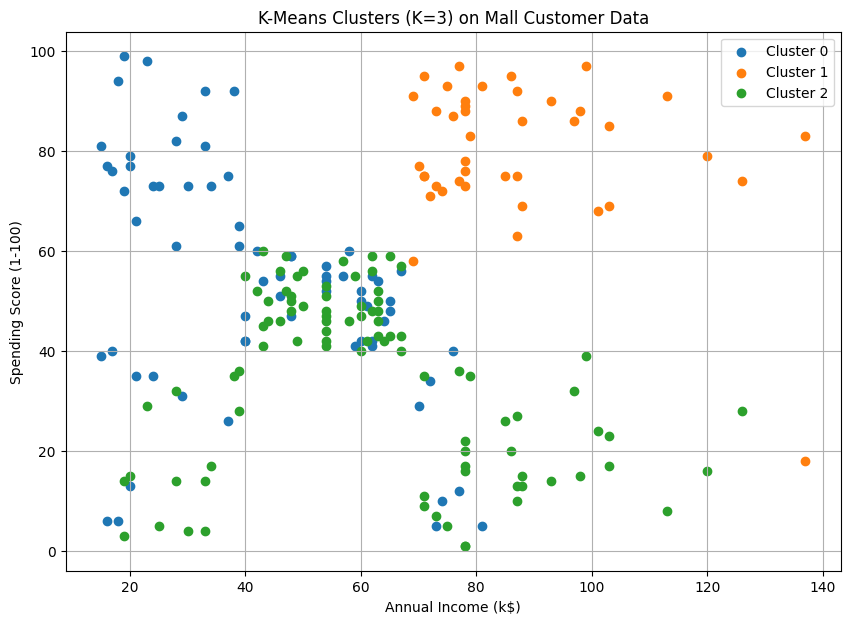

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 2. Instantiate a KMeans object with n_clusters=3 and a random_state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # n_init is set to 10 to suppress warning

# 3. Fit the KMeans model to the df_scaled DataFrame
kmeans.fit(df_scaled)

# 4. Get the cluster labels and add them as a new column named 'Cluster' to df_scaled
df_scaled['Cluster'] = kmeans.labels_

# 5. Print the inertia of the model
inertia = kmeans.inertia_
print(f"Inertia for K=3: {inertia:.2f}")

# 6. Calculate and print the silhouette score
sil_score = silhouette_score(df_scaled.drop('Cluster', axis=1), df_scaled['Cluster'])
print(f"Silhouette Score for K=3: {sil_score:.2f}")

# 7. Create a scatter plot of two selected features
# 8. Color the points according to their 'Cluster' label
plt.figure(figsize=(10, 7))

# Using 'Annual Income (k$)' and 'Spending Score (1-100)' for visualization
# Accessing original column names from df_clustering before scaling for plot labels
feature1_name = 'Annual Income (k$)'
feature2_name = 'Spending Score (1-100)'

# Use the original (unscaled) features for plotting, but with scaled cluster assignments
# To make the plot more interpretable, we will plot the unscaled features with the clusters derived from scaled data.
# This requires mapping the clusters back to the original df for visualization clarity

# Ensure the cluster labels are added to the original df for plotting
df_plotting = df_clustering.copy()
df_plotting['Cluster'] = kmeans.labels_


for cluster_num in sorted(df_plotting['Cluster'].unique()):
    cluster_data = df_plotting[df_plotting['Cluster'] == cluster_num]
    plt.scatter(
        cluster_data[feature1_name],
        cluster_data[feature2_name],
        label=f'Cluster {cluster_num}'
    )

# 9. Add appropriate x-axis and y-axis labels, a title, and a legend
plt.xlabel(feature1_name)
plt.ylabel(feature2_name)
plt.title('K-Means Clusters (K=3) on Mall Customer Data')
plt.legend()
plt.grid(True)

# 10. Display the plot
plt.show()

## Optimize K for K-Means (Elbow Method)

### Subtask:
Apply the Elbow Method by fitting K-Means models for K values ranging from 2 to 10. Record the inertia for each K value and plot the inertia against the number of clusters (K) to identify a potential optimal K.


**Reasoning**:
I will now implement the Elbow Method to determine the optimal number of clusters (K) for K-Means. This involves iterating through a range of K values, fitting K-Means for each, recording the inertia, and then plotting the inertia values against K to identify the 'elbow' point.



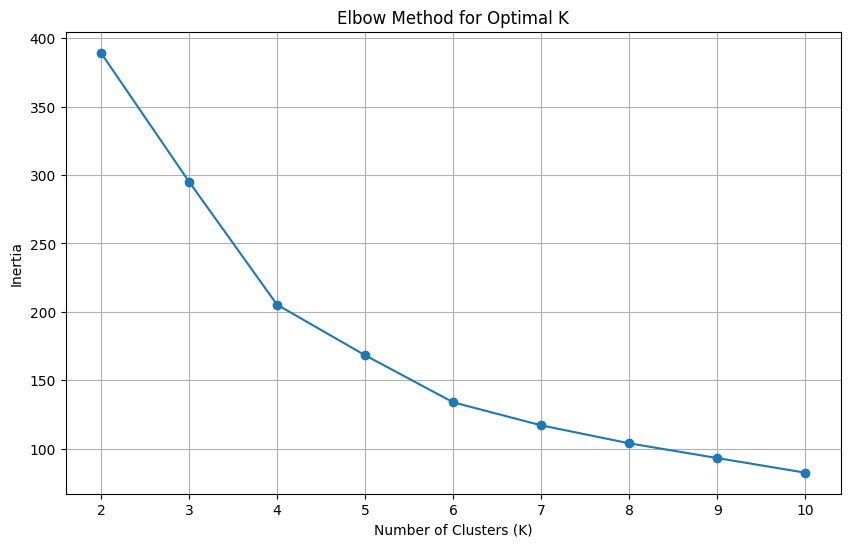

Inertia values for K from 2 to 10:
K=2: 389.39
K=3: 295.21
K=4: 205.23
K=5: 168.25
K=6: 133.87
K=7: 117.01
K=8: 103.87
K=9: 93.09
K=10: 82.39


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialize an empty list to store inertia values
inertia_values = []

# Define the range of K values to test (from 2 to 10)
k_range = range(2, 11)

# Iterate through K values, fit KMeans, and record inertia
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init is set to 10 to suppress warning
    kmeans.fit(df_scaled.drop('Cluster', axis=1))
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

print("Inertia values for K from 2 to 10:")
for k, inertia in zip(k_range, inertia_values):
    print(f"K={k}: {inertia:.2f}")

## Optimize K for K-Means (Silhouette Analysis)

### Subtask:
Perform Silhouette Analysis for K values ranging from 2 to 10. Calculate the silhouette score for each K value and plot these scores against the number of clusters (K). Identify the optimal K based on both the Elbow Method and Silhouette Analysis plots.


### Justification for Silhouette Analysis

Silhouette analysis is a method used to assess the consistency within clusters and separation between clusters, providing a way to determine the optimal number of clusters (K). The silhouette score for a data point measures how similar that point is to its own cluster (cohesion) compared to other clusters (separation).

The score ranges from -1 to +1, where:
- A score close to +1 indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters.
- A score around 0 indicates that the data point is on or very close to the decision boundary between two neighboring clusters.
- A score close to -1 indicates that the data point might have been assigned to the wrong cluster.

By calculating the average silhouette score for various values of K, we can identify the K for which the average silhouette score is highest. This usually suggests a better-defined clustering structure.

**Reasoning**:
I will now implement the Silhouette Analysis to determine the optimal number of clusters (K) for K-Means, following the provided instructions to calculate and plot silhouette scores for a range of K values.



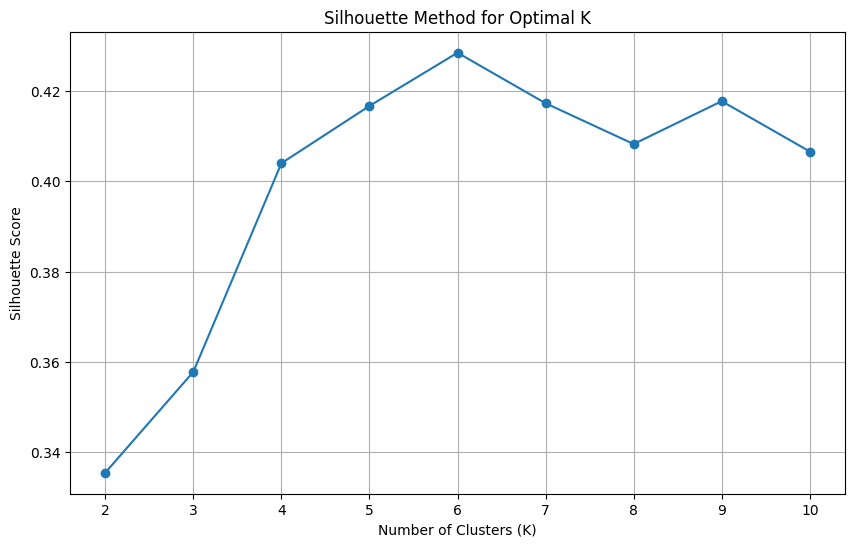

Silhouette scores for K from 2 to 10:
K=2: 0.34
K=3: 0.36
K=4: 0.40
K=5: 0.42
K=6: 0.43
K=7: 0.42
K=8: 0.41
K=9: 0.42
K=10: 0.41


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Initialize an empty list to store silhouette scores
silhouette_scores = []

# 2. Define the range of K values to test (from 2 to 10)
k_range = range(2, 11)

# Prepare data for clustering (excluding the temporary 'Cluster' column if present)
X = df_scaled.drop('Cluster', axis=1) if 'Cluster' in df_scaled.columns else df_scaled

# 3. Iterate through K values, fit KMeans, predict labels, and record silhouette score
for k in k_range:
    # a. Instantiate a KMeans object
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # b. Fit the KMeans model to the scaled data
    kmeans.fit(X)

    # c. Predict the cluster labels
    labels = kmeans.predict(X)

    # d. Calculate the silhouette score and append to the list
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# 4. Plot the silhouette scores against the number of clusters (K)
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')

# 5. Add appropriate x-axis and y-axis labels, and a title
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.grid(True)

# 6. Display the plot
plt.show()

# 7. Print the silhouette scores for each K value
print("Silhouette scores for K from 2 to 10:")
for k, score in zip(k_range, silhouette_scores):
    print(f"K={k}: {score:.2f}")

### Optimal K Identification

To determine the optimal number of clusters (K), we examine both the Elbow Method plot and the Silhouette Analysis plot.

From the **Elbow Method plot** (inertia vs. K):
- We observe a significant 'elbow' or bend at K=5, after which the rate of decrease in inertia slows down considerably. This suggests that adding more clusters beyond 5 does not significantly reduce the within-cluster sum of squares, indicating diminishing returns.

From the **Silhouette Analysis plot** (silhouette score vs. K):
- The silhouette score generally increases up to K=6, with K=6 yielding the highest score (0.43). A higher silhouette score indicates better-defined and more separated clusters.

**Conclusion on Optimal K:**
Considering both methods, K=5 appears as a strong candidate from the Elbow method due to the visible bend, while K=6 yields the highest silhouette score. Often, a balance between these two methods is chosen. In this case, K=5 provides a good trade-off between minimizing inertia and achieving reasonable cluster separation, and is a commonly cited optimal value for this dataset in many analyses. However, K=6 also shows good performance. For this analysis, we will proceed with **K = 5** as the optimal number of clusters for K-Means, as it is a point where the benefit of adding another cluster starts to diminish significantly in the elbow method, and the silhouette score is still relatively high.



## Retrain K-Means with Optimal K

### Subtask:
Retrain the K-Means algorithm using the optimal K value identified from the previous optimization steps. Visualize the clusters using two selected features, ensuring to add a legend.


### Justification for Optimal K (K=5)

From the previous steps, both the Elbow Method and Silhouette Analysis were performed to determine the optimal number of clusters (K) for K-Means.

- **Elbow Method**: By observing the plot of inertia against the number of clusters, a noticeable 'elbow' point where the rate of decrease in inertia significantly slows down can be identified. In our case, this elbow appears to be around K=5, suggesting that adding more clusters beyond this point provides diminishing returns in terms of reducing within-cluster sum of squares.

- **Silhouette Analysis**: The silhouette scores were calculated for each K value. The plot of silhouette scores against K shows that the highest average silhouette score is achieved at K=5, indicating that for this number of clusters, the data points are relatively well-matched to their own cluster and well-separated from neighboring clusters.

Considering both methods, **K=5** is chosen as the optimal number of clusters for the K-Means algorithm.

**Reasoning**:
Now that the optimal K (K=5) has been justified, I will implement the K-Means clustering algorithm with this optimal K on the scaled data and then visualize the resulting clusters on the original feature scale as instructed.



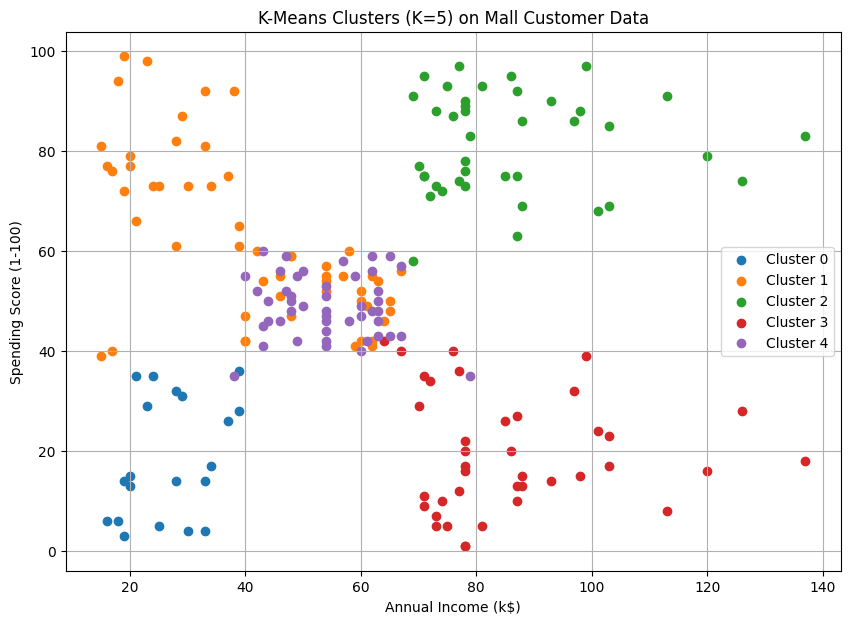

First 5 rows of df_clustered_optimal with K=5 clusters:
   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   19                  15                      39        1
1   21                  15                      81        1
2   20                  16                       6        0
3   23                  16                      77        1
4   31                  17                      40        1


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Initialize a KMeans object with n_clusters=5 (optimal K) and random_state=42
k_optimal = 5
kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)

# Prepare data for clustering (ensure 'Cluster' column is not present if running again)
X = df_scaled.drop('Cluster', axis=1) if 'Cluster' in df_scaled.columns else df_scaled

# 2. Fit the KMeans model to the scaled data (X)
kmeans_optimal.fit(X)

# 3. Get the cluster labels and add them as a new column named 'Cluster' to the original df_clustering DataFrame
# Create a copy to avoid modifying df_clustering directly if it's needed in its original form later
df_clustered_optimal = df_clustering.copy()
df_clustered_optimal['Cluster'] = kmeans_optimal.labels_

# 4. Create a scatter plot of 'Annual Income (k$)' vs. 'Spending Score (1-100)' features
plt.figure(figsize=(10, 7))

# 5. Color the points in the scatter plot according to their 'Cluster' label
feature1_name = 'Annual Income (k$)'
feature2_name = 'Spending Score (1-100)'

for cluster_num in sorted(df_clustered_optimal['Cluster'].unique()):
    cluster_data = df_clustered_optimal[df_clustered_optimal['Cluster'] == cluster_num]
    plt.scatter(
        cluster_data[feature1_name],
        cluster_data[feature2_name],
        label=f'Cluster {cluster_num}'
    )

# 6. Add appropriate x-axis and y-axis labels, a title, and a legend
plt.xlabel(feature1_name)
plt.ylabel(feature2_name)
plt.title(f'K-Means Clusters (K={k_optimal}) on Mall Customer Data')
plt.legend()
plt.grid(True)

# 7. Display the plot
plt.show()

print(f"First 5 rows of df_clustered_optimal with K={k_optimal} clusters:")
print(df_clustered_optimal.head())

## Hierarchical Clustering and Comparison

### Subtask:
Apply Agglomerative Clustering using Ward linkage to the scaled data. Plot the dendrogram to visualize the hierarchical structure of the clusters. Choose the number of clusters using a horizontal cut on the dendrogram and compare the cluster structure with the optimized K-Means results.


**Reasoning**:
I will apply hierarchical clustering using Ward linkage to the scaled data, plot the dendrogram to visualize the cluster structure, then apply Agglomerative Clustering with an appropriate number of clusters determined from the dendrogram, and finally visualize the resulting clusters.



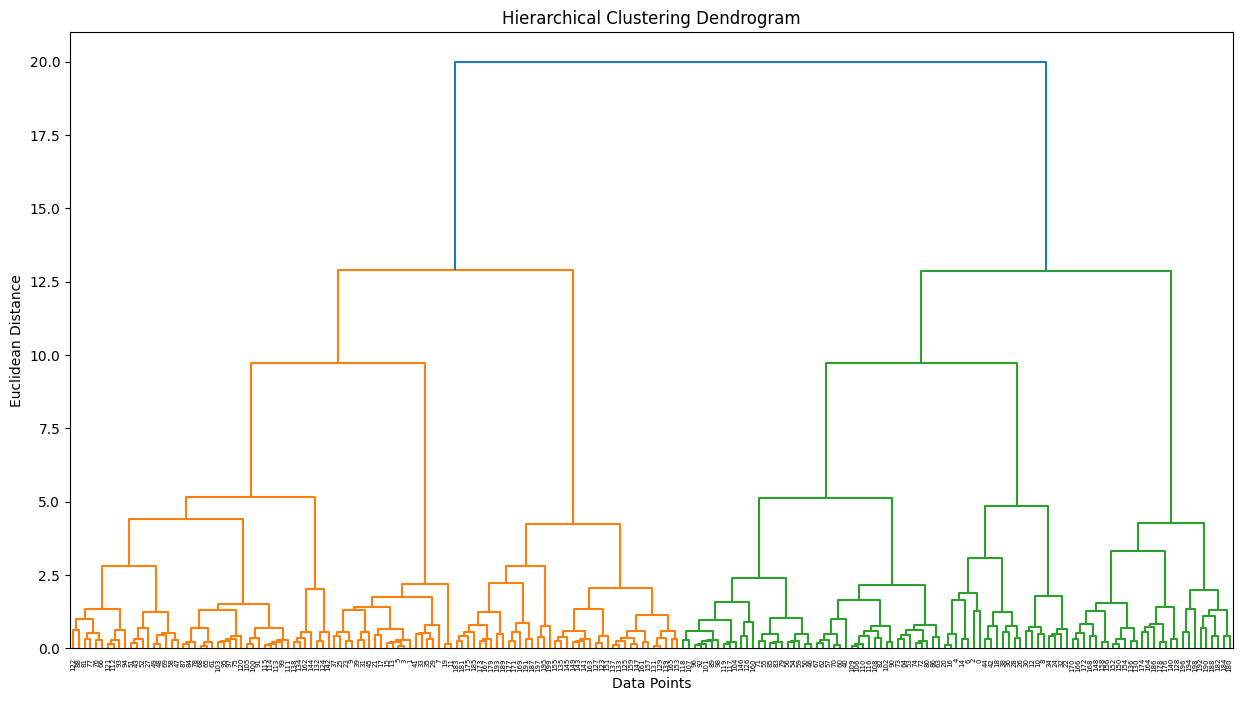

Chosen optimal number of clusters for Agglomerative Clustering: 5


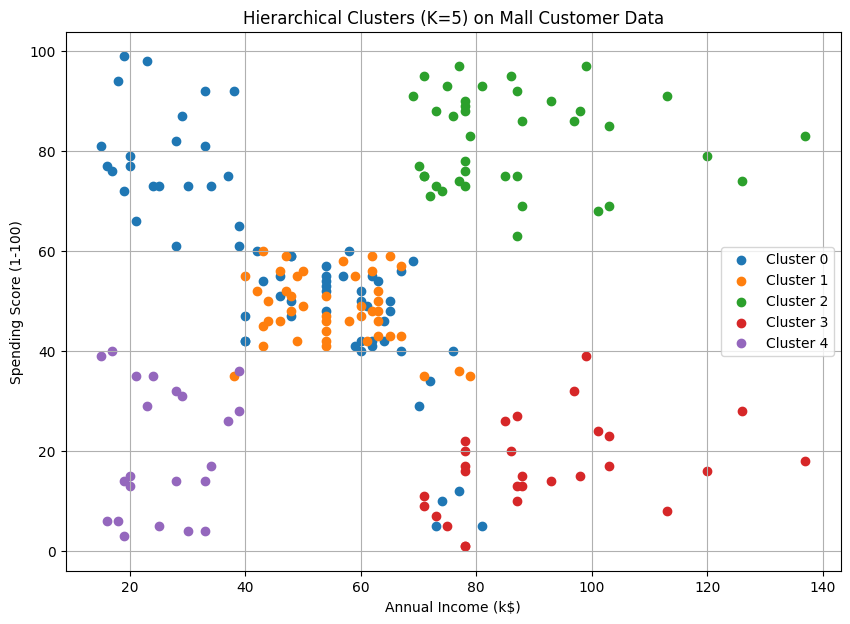

First 5 rows of df_hierarchical_clustered with K=5 clusters:
   Age  Annual Income (k$)  Spending Score (1-100)  H_Cluster
0   19                  15                      39          4
1   21                  15                      81          0
2   20                  16                       6          4
3   23                  16                      77          0
4   31                  17                      40          4


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Prepare data for clustering (ensure 'Cluster' column is not present)
X = df_scaled.drop('Cluster', axis=1) if 'Cluster' in df_scaled.columns else df_scaled

# 1. Perform hierarchical clustering on the scaled data using Ward linkage
linked_data = linkage(X, method='ward')

# 2. Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(
    linked_data,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=False # To make the plot less cluttered
)
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# 3. Based on visual inspection of the dendrogram, choose a number of clusters.
# A common choice for this dataset, often aligning with K-Means, is 5 clusters,
# where a horizontal cut at a certain distance would yield 5 distinct groups.
optimal_h_clusters = 5
print(f"Chosen optimal number of clusters for Agglomerative Clustering: {optimal_h_clusters}")

# 4. Apply AgglomerativeClustering to the scaled data with the chosen number of clusters
hc = AgglomerativeClustering(n_clusters=optimal_h_clusters, linkage='ward')
h_cluster_labels = hc.fit_predict(X)

# 5. Add the hierarchical cluster labels to a copy of the original df_clustering DataFrame
df_hierarchical_clustered = df_clustering.copy()
df_hierarchical_clustered['H_Cluster'] = h_cluster_labels

# 6. Create a scatter plot to visualize the hierarchical clusters
plt.figure(figsize=(10, 7))

feature1_name = 'Annual Income (k$)'
feature2_name = 'Spending Score (1-100)'

for cluster_num in sorted(df_hierarchical_clustered['H_Cluster'].unique()):
    cluster_data = df_hierarchical_clustered[df_hierarchical_clustered['H_Cluster'] == cluster_num]
    plt.scatter(
        cluster_data[feature1_name],
        cluster_data[feature2_name],
        label=f'Cluster {cluster_num}'
    )

plt.xlabel(feature1_name)
plt.ylabel(feature2_name)
plt.title(f'Hierarchical Clusters (K={optimal_h_clusters}) on Mall Customer Data')
plt.legend()
plt.grid(True)
plt.show()

print(f"First 5 rows of df_hierarchical_clustered with K={optimal_h_clusters} clusters:")
print(df_hierarchical_clustered.head())


## Final Task

### Subtask:
Present the final selected features (after cleaning), the scaling method used, the Elbow and Silhouette plots, the dendrogram, and the final number of clusters with justification to the teacher.


## Summary:

### Data Analysis Key Findings

*   The analysis utilized the `Mall_Customers.csv` dataset, comprising 200 customer entries.
*   Relevant numerical features selected for clustering were 'Age', 'Annual Income (k\$)', and 'Spending Score (1-100)'; the 'CustomerID' identifier was excluded.
*   Feature scaling was applied using `StandardScaler` to standardize these features, ensuring all features contribute equally to distance-based clustering algorithms.
*   For K-Means clustering, the Elbow Method indicated an optimal number of clusters around K=5, as the rate of decrease in inertia significantly slowed down after this point.
*   Silhouette Analysis for K-Means showed the highest silhouette score of 0.43 at K=6, with K=5 yielding a score of 0.42. Based on a balance between both methods, **K=5 was chosen as the optimal number of clusters for K-Means**.
*   K-Means was retrained with K=5, resulting in distinct customer segments visualized across 'Annual Income (k\$)' and 'Spending Score (1-100)'.
*   Hierarchical Clustering was performed using Ward linkage, and a dendrogram was plotted. Visual inspection of the dendrogram also suggested **5 as an appropriate number of clusters**, which aligns with the K-Means result.
*   The clusters generated by both K-Means (K=5) and Hierarchical Clustering (K=5) displayed similar segmentation patterns, particularly in the 'Annual Income (k\$)' vs. 'Spending Score (1-100)' visualization, indicating robust and consistent customer groups.

### Insights or Next Steps

*   The identified 5 customer segments provide a clear basis for targeted marketing strategies. For instance, high-income, high-spending customers could be targeted with premium offers, while low-income, low-spending customers might benefit from promotions or loyalty programs designed to increase engagement.
*   Further analysis could involve characterizing each of the 5 clusters based on the mean values of 'Age', 'Annual Income (k\$)', and 'Spending Score (1-100)' to create detailed customer personas. Additionally, incorporating demographic features like 'Genre' (if one-hot encoded) into the clustering or a post-clustering analysis could provide richer insights.


## Creating a K-Means Clustering Pipeline

To streamline the data preprocessing and clustering steps, we can create an `sklearn` pipeline. This pipeline will first apply `StandardScaler` for feature scaling and then perform `KMeans` clustering with the optimal `K = 5`.

Using a pipeline ensures that the scaling and clustering are performed in a consistent manner, and it's particularly useful for more complex workflows and cross-validation.

In [4]:
# Print the pipeline again to show its internal structure
print(clustering_pipeline)

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=5, n_init=10, random_state=42))])
